<a href="https://colab.research.google.com/github/Imama-Kainat/ByteWise-MLDL/blob/main/CleanBankMarketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-3-8e2dd61a60da>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client["education"] = client["education"].str.replace(".", "_")
<ipython-input-3-8e2dd61a60da>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client["education"] = client["education"].replace("unknown", np.NaN)
<ipython-input-3-8e2dd61a60da>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

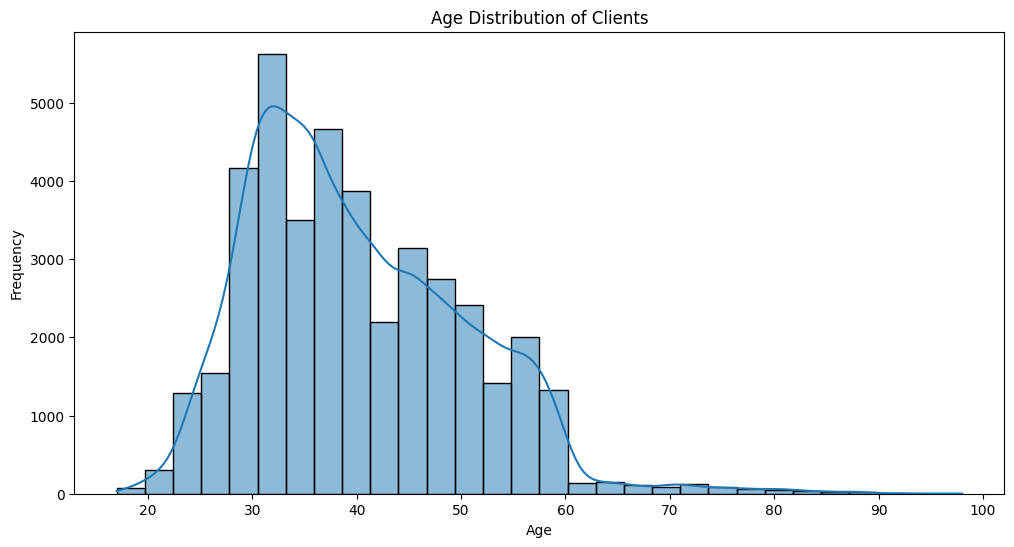

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset into a pandas DataFrame
marketing = pd.read_csv("bank_marketing.csv")

# Split the original dataset into three tables for detailed analysis
client = marketing[["client_id", "age", "job", "marital",
                    "education", "credit_default", "mortgage"]]

campaign = marketing[["client_id", "number_contacts", "month", "day",
                      "contact_duration", "previous_campaign_contacts", "previous_outcome", "campaign_outcome"]]

economics = marketing[["client_id", "cons_price_idx", "euribor_three_months"]]

# Data cleaning and formatting for the 'client' table
client["education"] = client["education"].str.replace(".", "_")
client["education"] = client["education"].replace("unknown", np.NaN)
client["job"] = client["job"].str.replace(".", "")
for col in ["credit_default", "mortgage"]:
    client[col] = client[col].astype(bool)

# Editing and formatting the 'campaign' table
campaign["campaign_outcome"] = campaign["campaign_outcome"].map({"yes": 1, "no": 0})
campaign["previous_outcome"] = campaign["previous_outcome"].map({"success": 1, "failure": 0, "nonexistent": 0})
campaign["month"] = campaign["month"].str.capitalize()
campaign["day"] = campaign["day"].astype(str)
campaign["year"] = "2022"
campaign["last_contact_date"] = campaign["year"] + "-" + campaign["month"] + "-" + campaign["day"]
campaign["last_contact_date"] = pd.to_datetime(campaign["last_contact_date"], format="%Y-%b-%d")
for col in ["campaign_outcome", "previous_outcome"]:
    campaign[col] = campaign[col].astype(bool)
campaign.drop(columns=["month", "day", "year"], inplace=True)

# Save the cleaned and formatted tables to individual csv files
client.to_csv("client.csv", index=False)
campaign.to_csv("campaign.csv", index=False)
economics.to_csv("economics.csv", index=False)

# Visualization: Age Distribution of Clients
plt.figure(figsize=(12, 6))
sns.histplot(client['age'], bins=30, kde=True)
plt.title('Age Distribution of Clients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



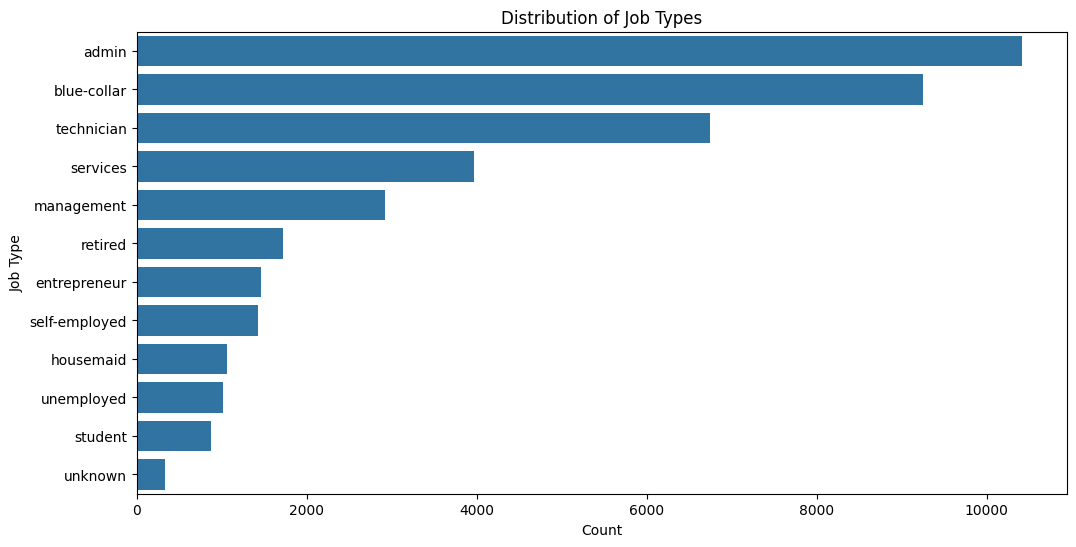

In [4]:
# Visualization: Job Distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='job', data=client, order=client['job'].value_counts().index)
plt.title('Distribution of Job Types')
plt.xlabel('Count')
plt.ylabel('Job Type')
plt.show()


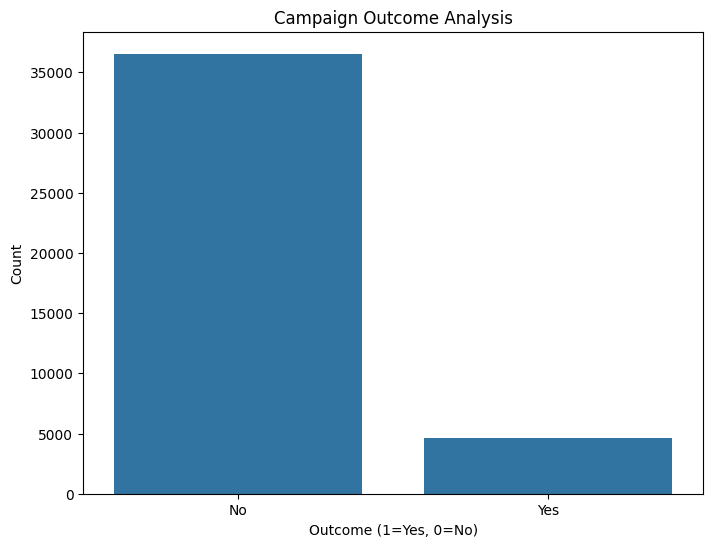

In [5]:

# Visualization: Campaign Outcome Analysis
plt.figure(figsize=(8, 6))
sns.countplot(x='campaign_outcome', data=campaign)
plt.title('Campaign Outcome Analysis')
plt.xlabel('Outcome (1=Yes, 0=No)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


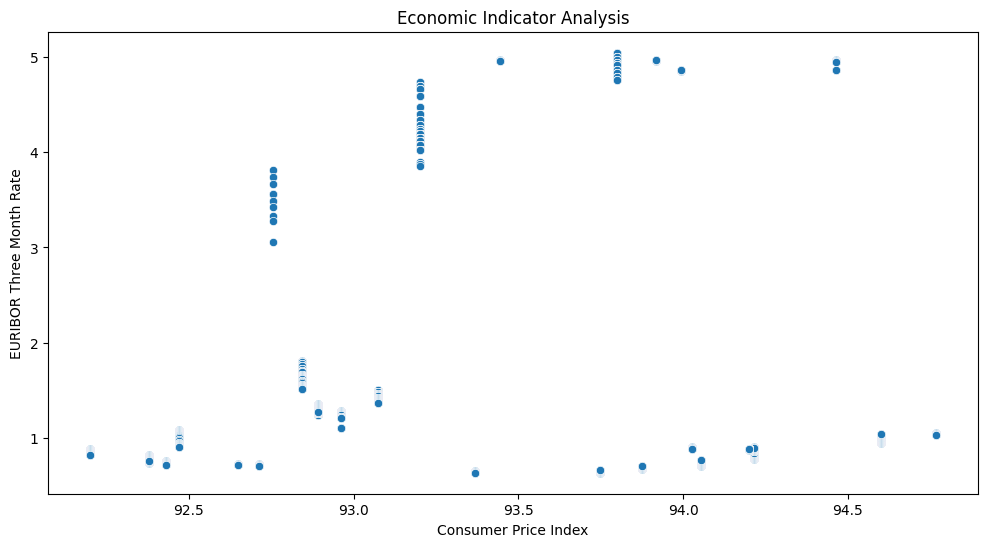

In [6]:
# Visualization: Economic Indicator Analysis
plt.figure(figsize=(12, 6))
sns.scatterplot(x='cons_price_idx', y='euribor_three_months', data=economics)
plt.title('Economic Indicator Analysis')
plt.xlabel('Consumer Price Index')
plt.ylabel('EURIBOR Three Month Rate')
plt.show()# Visualization: Age Distribution of Clients